In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/most-streamed-spotify-songs-2024/Most Streamed Spotify Songs 2024.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('/kaggle/input/most-streamed-spotify-songs-2024/Most Streamed Spotify Songs 2024.csv', encoding='unicode_escape' )

In [4]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [6]:
df.shape

(4600, 29)

In [7]:
df.isnull().sum(axis=0)

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Explicit Track      

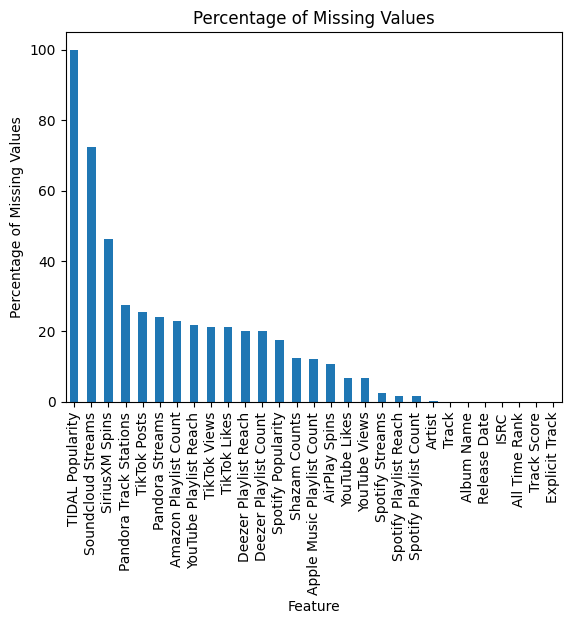

In [8]:
missing_percentages = {}
for i in df.columns:
    total_per = (df[i].isnull().sum() / df.shape[0]) * 100
    missing_percentages[i] = total_per
sorted_missing_percentages = dict(sorted(missing_percentages.items(), key=lambda item: item[1], reverse=True))
sorted_missing_series = pd.Series(sorted_missing_percentages)
sorted_missing_series.plot(kind='bar')
plt.title('Percentage of Missing Values')
plt.xlabel('Feature')
plt.ylabel('Percentage of Missing Values')
plt.show()

In [9]:
(df.isnull().sum()/df.shape[0]) * 100  > 40


Track                         False
Album Name                    False
Artist                        False
Release Date                  False
ISRC                          False
All Time Rank                 False
Track Score                   False
Spotify Streams               False
Spotify Playlist Count        False
Spotify Playlist Reach        False
Spotify Popularity            False
YouTube Views                 False
YouTube Likes                 False
TikTok Posts                  False
TikTok Likes                  False
TikTok Views                  False
YouTube Playlist Reach        False
Apple Music Playlist Count    False
AirPlay Spins                 False
SiriusXM Spins                 True
Deezer Playlist Count         False
Deezer Playlist Reach         False
Amazon Playlist Count         False
Pandora Streams               False
Pandora Track Stations        False
Soundcloud Streams             True
Shazam Counts                 False
TIDAL Popularity            

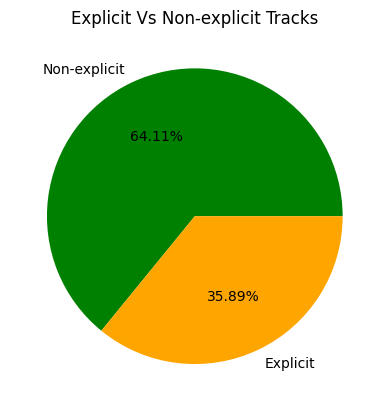

In [10]:
explicit_counts = df['Explicit Track'].value_counts()
plt.pie(explicit_counts, labels=['Non-explicit', 'Explicit'], autopct='%1.2f%%', colors=['green', 'orange'])
plt.title('Explicit Vs Non-explicit Tracks')
plt.show()

In [11]:
df.describe(include='all')

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
count,4600,4600,4595,4600,4600,4600,4600.000000,4487,4530,4528,...,2477,3679.000000,3672,3545.000000,3494,3332,1267,4023,0.0,4600.000000
unique,4370,4005,1999,1562,4598,4577,NaN,4425,4207,4478,...,689,NaN,3558,NaN,3491,2975,1265,4002,NaN,NaN
top,Danza Kuduro - Cover,Un Verano Sin Ti,Drake,1/1/2012,USWL11700269,"3,441",NaN,"1,655,575,417",1,3,...,1,NaN,"1,097",NaN,"56,972,562",9,27,1,NaN,NaN
freq,13,20,63,38,2,2,NaN,4,46,8,...,54,NaN,17,NaN,2,6,2,5,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,41.844043,NaN,NaN,NaN,...,NaN,32.310954,NaN,25.348942,NaN,NaN,NaN,NaN,NaN,0.358913
std,NaN,NaN,NaN,NaN,NaN,NaN,38.543766,NaN,NaN,NaN,...,NaN,54.274538,NaN,25.989826,NaN,NaN,NaN,NaN,NaN,0.479734
min,NaN,NaN,NaN,NaN,NaN,NaN,19.400000,NaN,NaN,NaN,...,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,23.300000,NaN,NaN,NaN,...,NaN,5.000000,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,29.900000,NaN,NaN,NaN,...,NaN,15.000000,NaN,17.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,44.425000,NaN,NaN,NaN,...,NaN,37.000000,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,1.000000


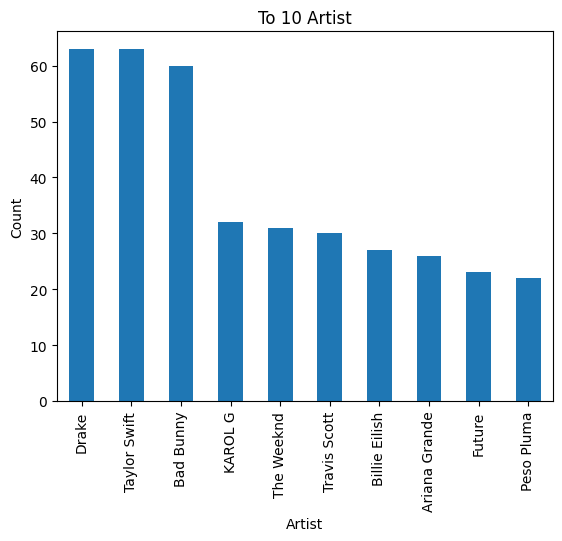

In [12]:
top = df['Artist'].value_counts().head(10)
top.plot(kind = 'bar')
plt.title('To 10 Artist')
plt.xlabel('Artist')
plt.ylabel('Count')
plt.show()

In [13]:
df.drop(columns = ['TIDAL Popularity','Soundcloud Streams','SiriusXM Spins','Track', 'Album Name','ISRC','Artist'], axis = 1, inplace = True)

In [14]:
df.head()

,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,...,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,4/26/2024,1,725.4,"390,470,936","30,716","196,631,588",92.0,"84,274,754","1,713,126","5,767,700",...,"150,597,040",210.0,"40,975",62.0,"17,598,718",114.0,"18,004,655","22,931","2,669,262",0
1,5/4/2024,2,545.9,"323,703,884","28,113","174,597,137",92.0,"116,347,040","3,486,739","674,700",...,"156,380,351",188.0,"40,778",67.0,"10,422,430",111.0,"7,780,028","28,444","1,118,279",1
2,3/19/2024,3,538.4,"601,309,283","54,331","211,607,669",92.0,"122,599,116","2,228,730","3,025,400",...,"373,784,955",190.0,"74,333",136.0,"36,321,847",172.0,"5,022,621","5,639","5,285,340",0
3,1/12/2023,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,"1,096,100,899","10,629,796","7,189,811",...,"3,351,188,582",394.0,"1,474,799",264.0,"24,684,248",210.0,"190,260,277","203,384","11,822,942",0
4,5/31/2024,5,423.3,"107,034,922","7,223","151,469,874",88.0,"77,373,957","3,670,188","16,400",...,"112,763,851",182.0,"12,185",82.0,"17,660,624",105.0,"4,493,884","7,006","457,017",1


In [15]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Year'] = df['Release Date'].dt.year

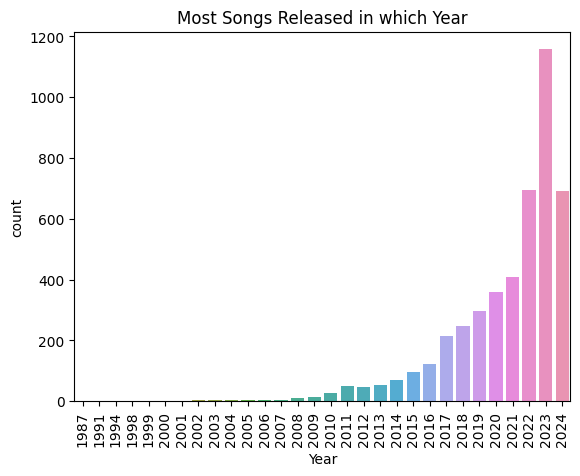

In [16]:
sns.countplot(data = df, x = 'Year')
plt.title('Most Songs Released in which Year')
plt.xticks(rotation = 90)
plt.show()

In [17]:
df.drop('Release Date', axis = 1, inplace = True)


In [18]:
columns_to_be_changed = df.select_dtypes(include=['object']).columns.tolist()
columns_to_be_changed

['All Time Rank',
 'Spotify Streams',
 'Spotify Playlist Count',
 'Spotify Playlist Reach',
 'YouTube Views',
 'YouTube Likes',
 'TikTok Posts',
 'TikTok Likes',
 'TikTok Views',
 'YouTube Playlist Reach',
 'AirPlay Spins',
 'Deezer Playlist Reach',
 'Pandora Streams',
 'Pandora Track Stations',
 'Shazam Counts']

In [19]:
for col in columns_to_be_changed:
    df[col] = df[col].str.replace(',', '').astype(float)
print(df.dtypes)

All Time Rank                 float64
Track Score                   float64
Spotify Streams               float64
Spotify Playlist Count        float64
Spotify Playlist Reach        float64
Spotify Popularity            float64
YouTube Views                 float64
YouTube Likes                 float64
TikTok Posts                  float64
TikTok Likes                  float64
TikTok Views                  float64
YouTube Playlist Reach        float64
Apple Music Playlist Count    float64
AirPlay Spins                 float64
Deezer Playlist Count         float64
Deezer Playlist Reach         float64
Amazon Playlist Count         float64
Pandora Streams               float64
Pandora Track Stations        float64
Shazam Counts                 float64
Explicit Track                  int64
Year                            int32
dtype: object


In [20]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(df)
df_filled = pd.DataFrame(imputer.transform(df), columns=df.columns)

In [21]:
df_filled.isnull().sum()


All Time Rank                 0
Track Score                   0
Spotify Streams               0
Spotify Playlist Count        0
Spotify Playlist Reach        0
Spotify Popularity            0
YouTube Views                 0
YouTube Likes                 0
TikTok Posts                  0
TikTok Likes                  0
TikTok Views                  0
YouTube Playlist Reach        0
Apple Music Playlist Count    0
AirPlay Spins                 0
Deezer Playlist Count         0
Deezer Playlist Reach         0
Amazon Playlist Count         0
Pandora Streams               0
Pandora Track Stations        0
Shazam Counts                 0
Explicit Track                0
Year                          0
dtype: int64

In [22]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filled)

In [23]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)
df['KMeans_Cluster'] = kmeans.labels_
df.head()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,...,AirPlay Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track,Year,KMeans_Cluster
0,1.0,725.4,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,...,40975.0,62.0,17598718.0,114.0,18004655.0,22931.0,2669262.0,0,2024,0
1,2.0,545.9,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,...,40778.0,67.0,10422430.0,111.0,7780028.0,28444.0,1118279.0,1,2024,0
2,3.0,538.4,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,...,74333.0,136.0,36321847.0,172.0,5022621.0,5639.0,5285340.0,0,2024,0
3,4.0,444.9,2.031281e+09,269802.0,136569078.0,85.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,...,1474799.0,264.0,24684248.0,210.0,190260277.0,203384.0,11822942.0,0,2023,0
4,5.0,423.3,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,16400.0,NaN,...,12185.0,82.0,17660624.0,105.0,4493884.0,7006.0,457017.0,1,2024,0


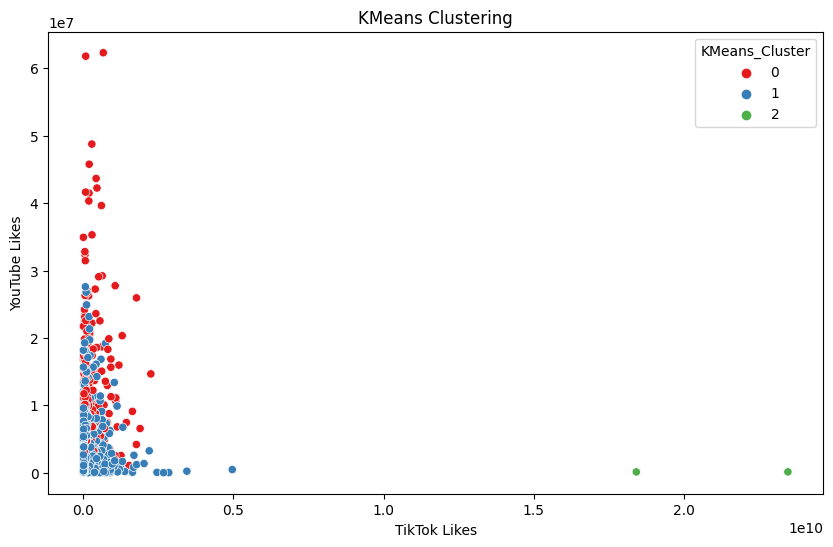

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TikTok Likes', y='YouTube Likes', hue='KMeans_Cluster', data=df, palette='Set1', legend='full')
plt.title('KMeans Clustering')
plt.show()